In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import casadi
from numpy import loadtxt
import numpy as np
from SHARED.aux_functions import *
from SHARED.params import *
from SHARED.model import *
from RL.environment import *
from SHARED.display_trajectories import print_metrics
from SHARED.display_trajectories import compare_metrics
from SHARED.display_trajectories import average_metrics
from RL.helperFunctions import *
import seaborn as sns
import pandas as pd
from SHARED.model import *
from enum import Enum
# %matplotlib widget



results/RL/Stochastic/scale_0.05
----------------------------  ------------
EPI                (EURO/m2)   4.95332
Total growth       (kg/m2)     0.304925
Total C02 usage    (kg/m2)     1.1646
Total Heating      (kWh)      12.6464
Computational Time (s)         0.000203692
FINAL PERFORMANCE              4.22607
----------------------------  ------------


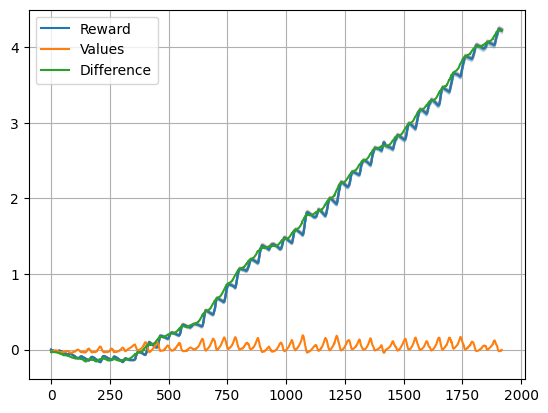

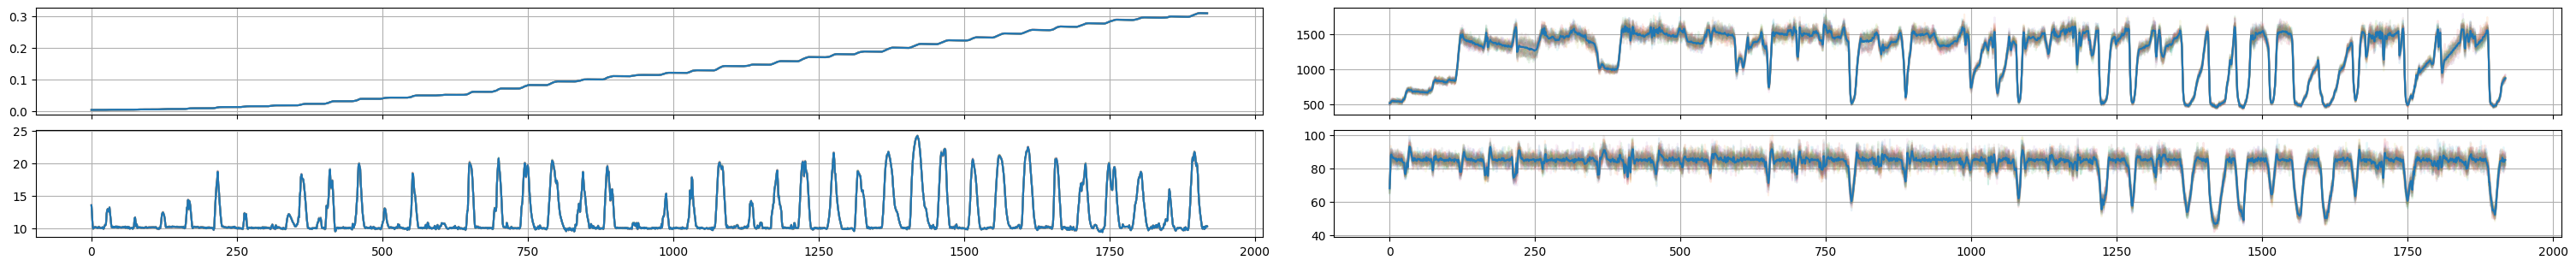

In [4]:
path = 'results/RL/Stochastic/scale_' + str(noise_scale)
# path = 'results/MPC/Stochastic/1_hr/scale_' + str(noise_scale)
print (path)
average_metrics(path)

# 3.58984

# 4.24719

Noise Model

[ 22.00000272  77.          53.00000151  74.00000231  81.
  66.0000001   86.9999999   34.          60.99999889  59.9999996
  87.          99.99999749 200.00000121 140.         150.9999995
 142.0000004 ]


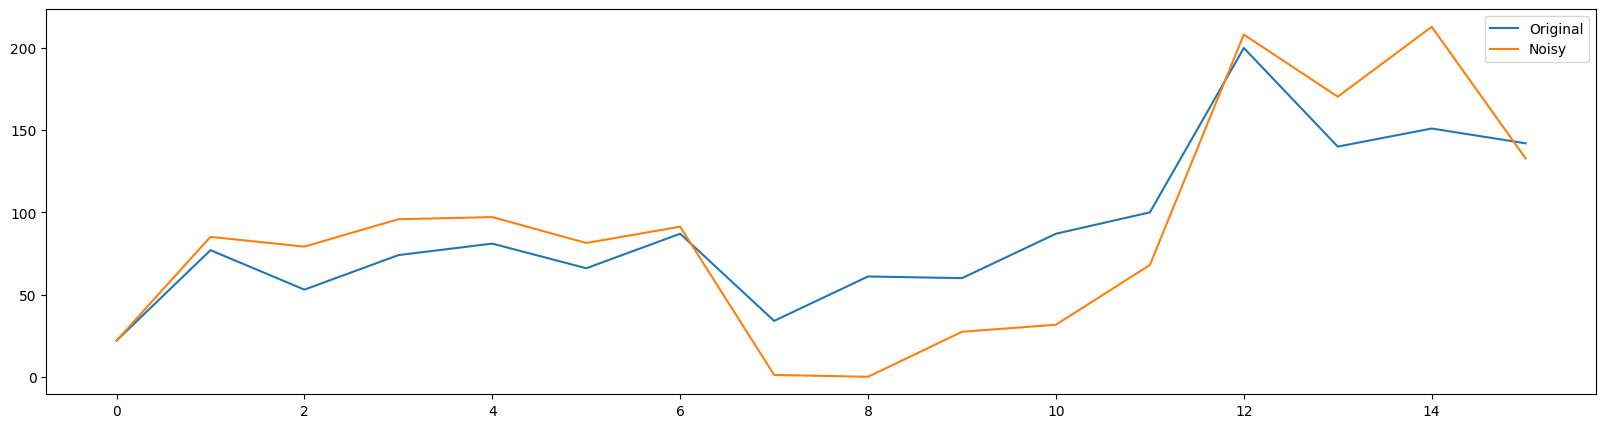

In [12]:
N = 16
noise = noise_model(scale=0.05,decay=0.9)
get_d = partial(get_disturbance,weather_data = weather_data,start_time=start_time,Np=N, dt=dT)


D_log = get_d(40)
print (D_log[0])
noisy_d = noise.add_noise(D_log)



plt.figure(figsize=(20,5))
plt.plot (D_log[0,:], label = "Original")
plt.plot (noisy_d[0,:], label = "Noisy")
plt.legend()

Loading

In [3]:
'''RL'''
Y_log_rl                = loadtxt('results/RL/Y_log.csv', delimiter=',')
U_log_rl                = loadtxt('results/RL/U_log.csv', delimiter=',')
D_log_rl                = np.expand_dims(loadtxt('results/RL/D_log.csv', delimiter=','),axis = 0)
vf_log_rl               = np.expand_dims(loadtxt('results/RL/vf_log.csv', delimiter=','),axis = 0)
time_log_rl             = loadtxt('results/RL/comp_time_log.csv', delimiter=',')
R_log_rl                = loadtxt('results/RL/rewards_log.csv', delimiter=',')

'''MPC'''   
Y_log_mpc               = loadtxt('results/MPC/Y_log.csv', delimiter=',')
U_log_mpc               = loadtxt('results/MPC/U_log.csv', delimiter=',')
D_log_mpc               = np.expand_dims(loadtxt('results/MPC/D_log.csv', delimiter=','),axis = 0)
time_log_mpc            = loadtxt('results/MPC/comp_time_log.csv', delimiter=',')
R_log_mpc               = loadtxt('results/MPC/rewards_log.csv', delimiter=',')

'''RL_MPC'''
Y_log_rl_mpc            = loadtxt('results/RL_MPC/Y_log.csv', delimiter=',')
U_log_rl_mpc            = loadtxt('results/RL_MPC/U_log.csv', delimiter=',')
D_log_rl_mpc            = np.expand_dims(loadtxt('results/RL_MPC/D_log.csv', delimiter=','),axis = 0)
time_log_rl_mpc         = loadtxt('results/RL_MPC/comp_time_log.csv', delimiter=',')
R_log_rl_mpc            = loadtxt('results/RL_MPC/rewards_log.csv', delimiter=',')

------------------  --------
RL --> MPC
EPI            (%)  36.3875
Growth         (%)  23.5305
C02 usage      (%)  -35.0223
Heating        (%)  2.41654
Ventilation    (%)  -62.3728
Time           (%)  916508
Perf           (%)  -183.296
------------------  --------
------------------  -----------
RL --> RL_MPC
EPI            (%)  36.369
Growth         (%)  23.4618
C02 usage      (%)  -35.3635
Heating        (%)  2.27383
Ventilation    (%)  -62.6352
Time           (%)  1.73609e+06
Perf           (%)  -175.523
------------------  -----------
------------------  ----------
MPC --> RL_MPC
EPI            (%)  -0.0135409
Growth         (%)  -0.0556109
C02 usage      (%)  -0.525207
Heating        (%)  -0.139338
Ventilation    (%)  -0.697551
Time           (%)  89.4145
Perf           (%)  -9.33209
------------------  ----------


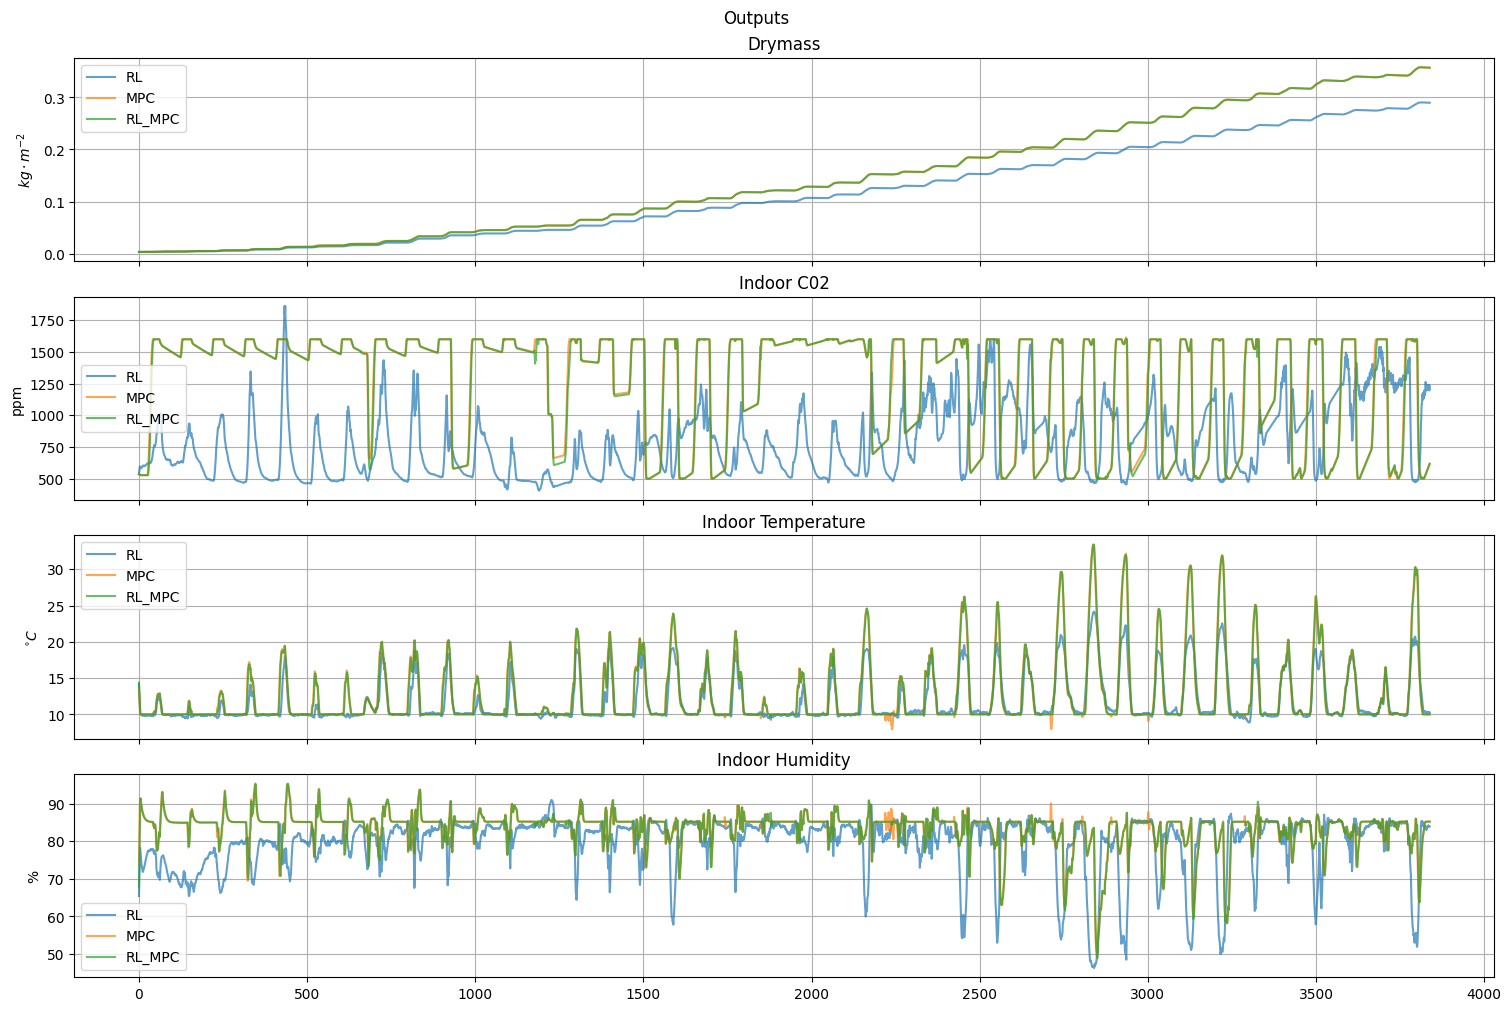

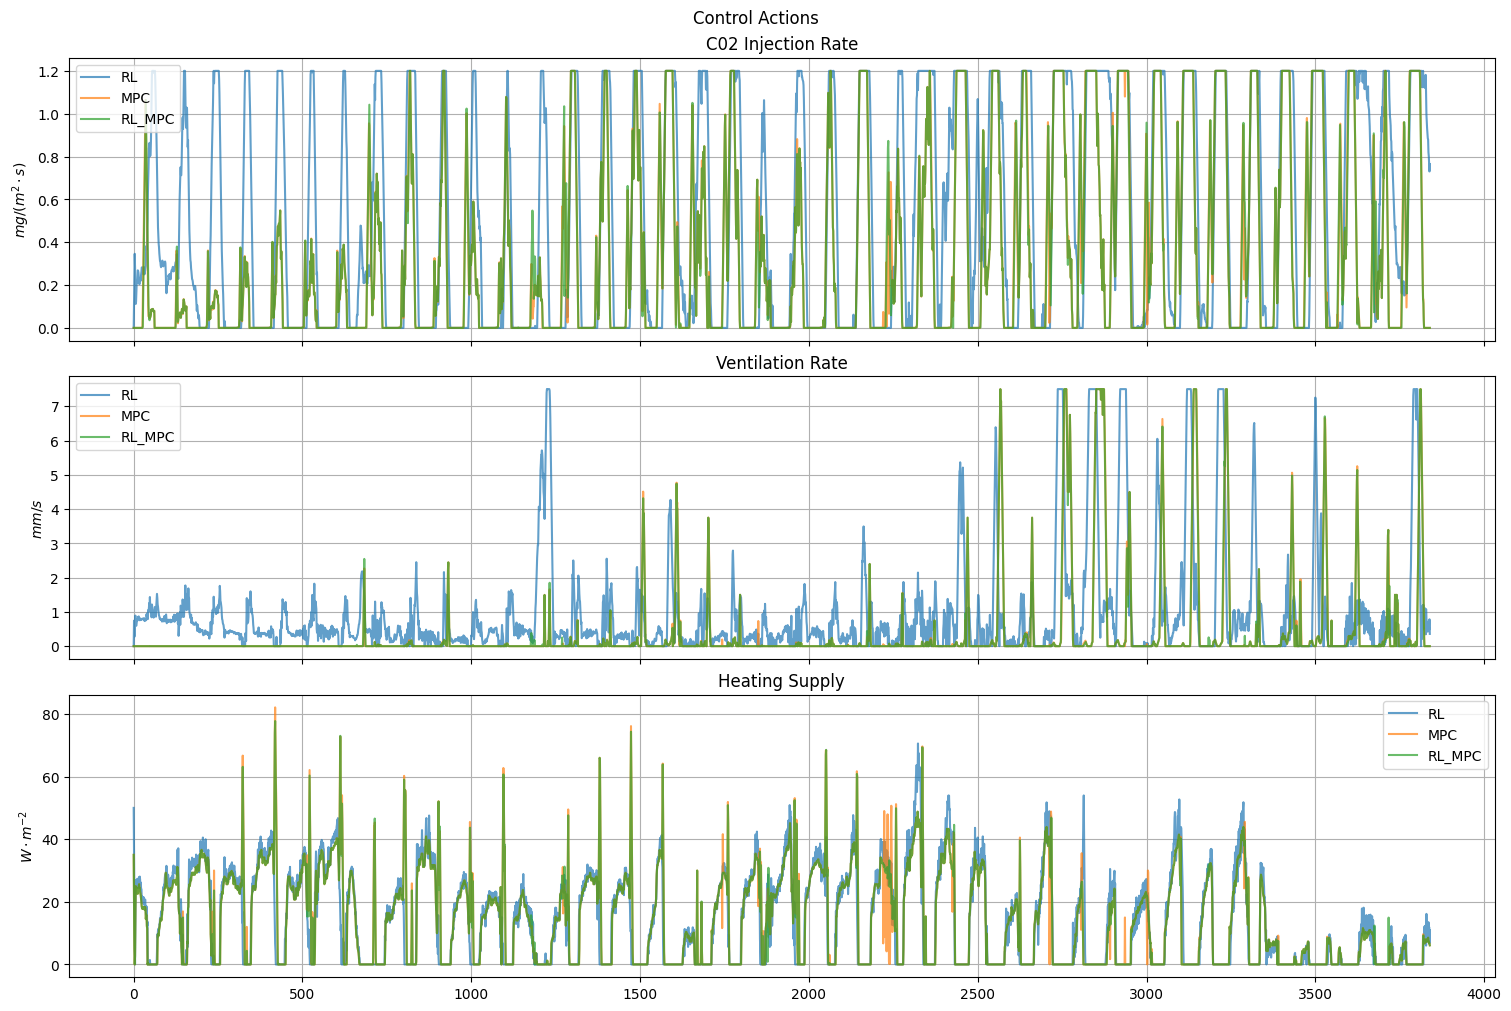

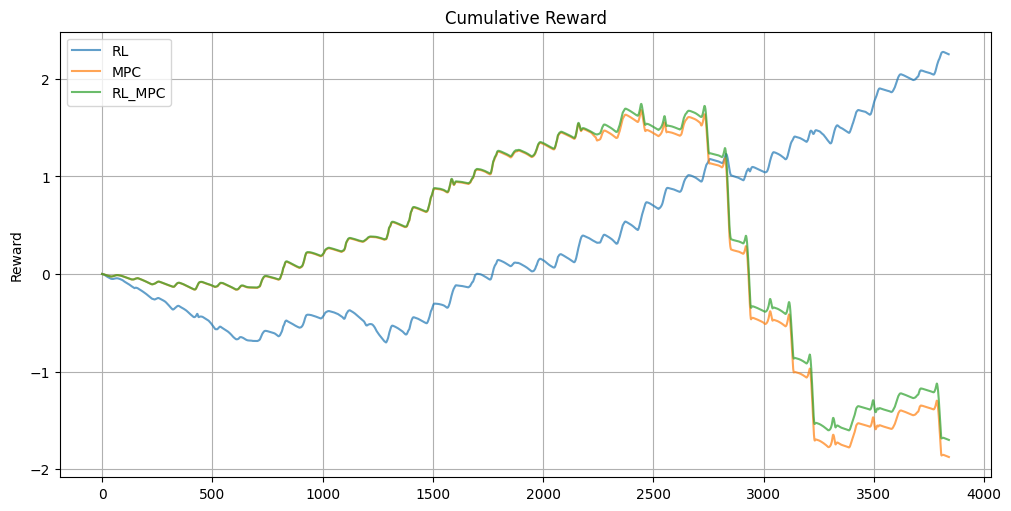

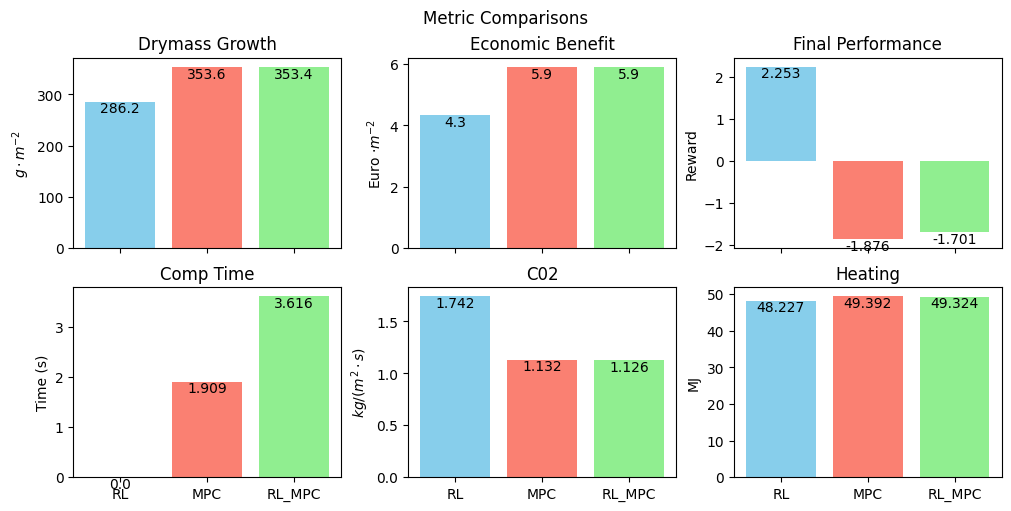

In [4]:
Y = {"rl"   :Y_log_rl,
    "mpc"   :Y_log_mpc,
    "rl_mpc":Y_log_rl_mpc}

U = {"rl"   :U_log_rl,
    "mpc"   :U_log_mpc,
    "rl_mpc":U_log_rl_mpc}

R = {"rl"   :R_log_rl,
    "mpc"   :R_log_mpc,
    "rl_mpc":R_log_rl_mpc}

T = {"rl"   :time_log_rl,
    "mpc"   :time_log_mpc,
    "rl_mpc":time_log_rl_mpc}

compare_metrics(Y_logs=Y,U_logs=U,reward_logs=R,comp_time_logs=T)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Text(0.5, 1.0, 'Final Performance')

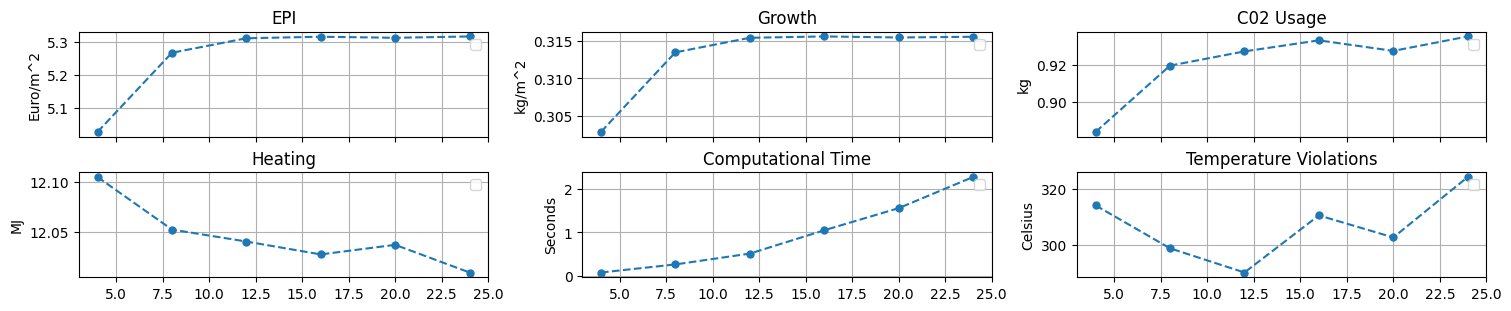

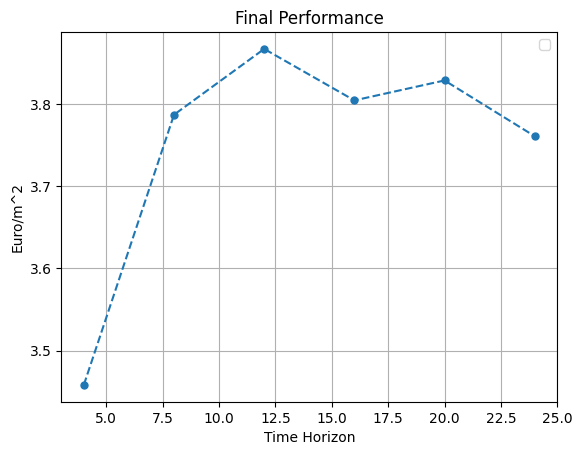

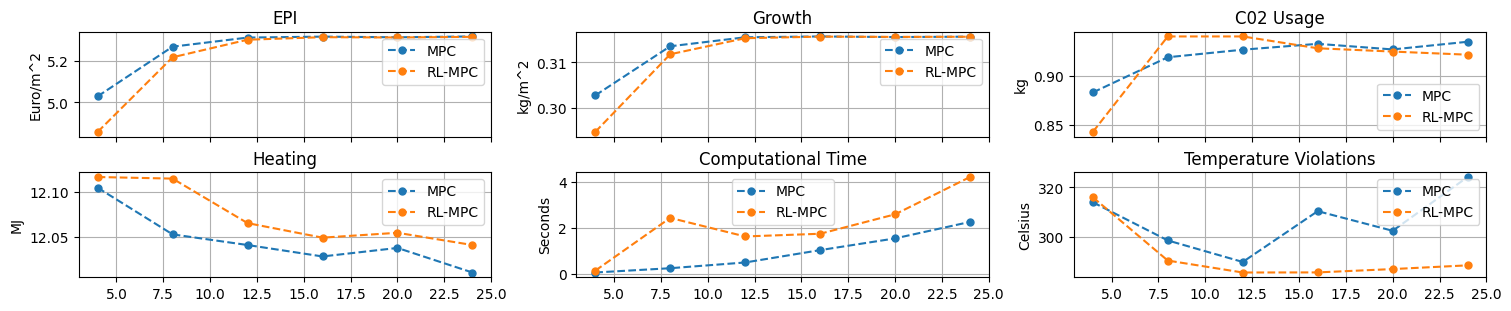

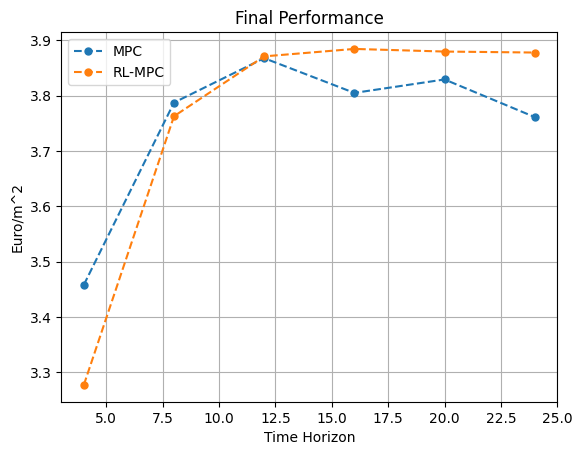

In [5]:
'''MPC TESTS
Reward function 1 -> difference in growth
Reward function 2 -> absolute growth
'''

time_steps      = [4,8,12,16,20,24]
MPC_perf_1      = [3.45806,3.7874,3.86762,3.80488,3.82918,3.76121]
MPC_epi_1       = [5.0289,	5.26709,	5.31071,	5.31529,	5.31209,	5.31616]
MPC_growth_1    = [0.302799,	0.313496,	0.315451,	0.315634,	0.315496,	0.315587]
MPC_c02_1       = [0.883351,	0.919639,	0.927425,	0.933466,	0.927692,	0.935603]
MPC_heat_1      = [12.1051,	12.0525,	12.0405,	12.0276,	12.0372,	12.0095]
MPC_time_1      = [0.0757485,	0.262002,	0.511517,	1.04858,	1.55808,	2.27585]
MPC_temp_viol_1 = [314.052,	298.686,	290.026,	310.475,	302.574,	324.214]

MPC_perf_2      = [3.52678,	2.84323, 0.280697, -1.1755]
MPC_epi_2       = [5.18438,	5.4896,	5.81488,	5.89976]
MPC_growth_2    = [0.310453,	0.327354,	0.345448,	0.35149]
MPC_c02_2       = [0.956651,	1.00383,	1.06283,	1.1041]
MPC_heat_2      = [12.1136,	12.601,	13.1217,	13.4488]
MPC_time_2      = [0.0754827,0.363101,0.610574,1.3037]
MPC_temp_viol_2 = [331.401,	530.762,	1110.05,	1423.77]

fig, axs_mpc = plt.subplots(2, 3, sharex=True, sharey=False, layout='constrained', figsize=(15, 3))
epi = axs_mpc[0,0]
epi.set_title("EPI")
epi.plot(time_steps,MPC_epi_1, marker='.',linestyle = '--', markersize = 10)
# epi.plot(time_steps[:-2],MPC_epi_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
epi.grid(True)
epi.set_ylabel("Euro/m^2")
epi.legend()

growth = axs_mpc[0,1]
growth.set_title("Growth")
growth.plot(time_steps,MPC_growth_1, marker='.',linestyle = '--', markersize = 10)
# growth.plot(time_steps[:-2],MPC_growth_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
growth.grid(True)
growth.set_ylabel("kg/m^2")
growth.legend()

c02 = axs_mpc[0,2]
c02.set_title("C02 Usage")
c02.plot(time_steps,MPC_c02_1, marker='.',linestyle = '--', markersize = 10)
# c02.plot(time_steps[:-2],MPC_c02_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
c02.grid(True)
c02.set_ylabel("kg")
c02.legend()

heating = axs_mpc[1,0]
heating.set_title("Heating")
heating.plot(time_steps,MPC_heat_1, marker='.',linestyle = '--', markersize = 10)
# heating.plot(time_steps[:-2],MPC_heat_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
heating.grid(True)
heating.set_ylabel("MJ")
heating.legend()

time_comp = axs_mpc[1,1]
time_comp.set_title("Computational Time")
time_comp.plot(time_steps,MPC_time_1, marker='.',linestyle = '--', markersize = 10)
# time_comp.plot(time_steps[:-2],MPC_time_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
time_comp.grid(True)
time_comp.set_ylabel("Seconds")
time_comp.legend()

temp_v = axs_mpc[1,2]
temp_v.set_title("Temperature Violations")
temp_v.plot(time_steps,MPC_temp_viol_1, marker='.',linestyle = '--', markersize = 10)
# temp_v.plot(time_steps[:-2],MPC_temp_viol_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
temp_v.grid(True)
temp_v.set_ylabel("Celsius")
temp_v.legend()


plt.figure()
plt.plot (time_steps,MPC_perf_1, marker='.',linestyle = '--', markersize = 10)
# plt.plot (time_steps[:-2],MPC_perf_2, marker='.',linestyle = '--', markersize = 10, label = "RF 2")
plt.legend()
plt.grid(True)
plt.ylabel("Euro/m^2")
plt.xlabel("Time Horizon")
plt.title("Final Performance")










'''RL-MPC vs MPC'''
RL_MPC_perf     = [3.27723,3.76274,3.8709,3.88435,3.87959,3.87782]
RL_MPC_epi      = [4.85813,	5.21621,	5.30045,	5.31262,	5.31114,	5.31429]
RL_MPC_growth   = [0.294858,	0.311758,	0.315249,	0.315597,	0.315533,	0.315568]
RL_MPC_c02      = [0.842663,	0.941079,	0.941084,	0.928886,	0.925494,	0.922278]
RL_MPC_heat     = [12.1172,	12.1154,	12.0652,	12.0488,	12.0543,	12.0405]
RL_MPC_time     = [0.154603,	2.44999,	1.64303,	1.76029,	2.60487,	4.22754]
RL_MPC_temp_viol= [316.067,	290.59,	285.788,	285.824,	287.17,	288.669]

fig, axs_rlmpc = plt.subplots(2, 3, sharex=True, sharey=False, layout='constrained', figsize=(15, 3))
epi = axs_rlmpc[0,0]
epi.set_title("EPI")
epi.plot(time_steps,MPC_epi_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
epi.plot(time_steps,RL_MPC_epi, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
epi.grid(True)
epi.set_ylabel("Euro/m^2")
epi.legend()

growth = axs_rlmpc[0,1]
growth.set_title("Growth")
growth.plot(time_steps,MPC_growth_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
growth.plot(time_steps,RL_MPC_growth, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
growth.grid(True)
growth.set_ylabel("kg/m^2")
growth.legend()

c02 = axs_rlmpc[0,2]
c02.set_title("C02 Usage")
c02.plot(time_steps,MPC_c02_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
c02.plot(time_steps,RL_MPC_c02, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
c02.grid(True)
c02.set_ylabel("kg")
c02.legend()

heating = axs_rlmpc[1,0]
heating.set_title("Heating")
heating.plot(time_steps,MPC_heat_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
heating.plot(time_steps,RL_MPC_heat, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
heating.grid(True)
heating.set_ylabel("MJ")
heating.legend()

time_comp = axs_rlmpc[1,1]
time_comp.set_title("Computational Time")
time_comp.plot(time_steps,MPC_time_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
time_comp.plot(time_steps,RL_MPC_time, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
time_comp.grid(True)
time_comp.set_ylabel("Seconds")
time_comp.legend()

temp_v = axs_rlmpc[1,2]
temp_v.set_title("Temperature Violations")
temp_v.plot(time_steps,MPC_temp_viol_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
temp_v.plot(time_steps,RL_MPC_temp_viol, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
temp_v.grid(True)
temp_v.set_ylabel("Celsius")
temp_v.legend()





plt.figure()
plt.plot (time_steps,MPC_perf_1, marker='.',linestyle = '--', markersize = 10, label = "MPC")
plt.plot (time_steps,RL_MPC_perf, marker='.',linestyle = '--', markersize = 10, label = "RL-MPC")
plt.legend()
plt.grid(True)
plt.ylabel("Euro/m^2")
plt.xlabel("Time Horizon")
plt.title("Final Performance")



